In [2]:
import pandas as pd
import os.path
from IPython.core.display import display, HTML
import seaborn as sns

In [1]:
prefix = '..'
model_name = 't5-small-SGD'
exp_name = 'naive-linear'
ver_name = 'test-2-61245'

test_dir = os.path.join(prefix, 'models', model_name, 'logs', exp_name, ver_name)
annotated_file = os.path.join(test_dir, 'annotated_cases.csv')
metrics_file = os.path.join(test_dir, 'metrics.csv')
domain_ser_file = os.path.join(test_dir, 'domain_ser.csv')

BASELINE_METRICS = {'bleu', 'ser'}

In [3]:
pd.set_option('max_colwidth', 300)

In [4]:
metrics_file

'../models/t5-small-SGD/logs/naive-linear/test-2-61245/metrics.csv'

In [5]:
res_df = pd.read_csv(metrics_file)

In [6]:
res_df.columns = ['metrics', model_name + f'({exp_name})']

In [7]:
comp_df = res_df[res_df['metrics'].map(lambda x: x in BASELINE_METRICS)]

In [8]:
comp_df['Kale 2020 naive'] = [26.2, 0.01]
comp_df['Kale 2020 schema'] = [26.2, 0.008]
comp_df['Kale 2020 T2G2'] = [28.6, 0.004]

In [9]:
comp_df.head()

,metrics,t5-small-SGD(naive-linear),Kale 2020 naive,Kale 2020 schema,Kale 2020 T2G2
0,bleu,21.661678,26.20,26.200,28.600
1,ser,0.156100,0.01,0.008,0.004


In [4]:
paper_df = pd.DataFrame({'metrics': ['bleu', 'ser'], 'Kale 2020 naive': [26.2, 0.01], 'Kale 2020 schema': [26.2, 0.008], 'Kale 2020 T2G2': [28.6, 0.004]})
def add_result(base_df, model_name, exp_name, ver_name, header_name=None):
    test_dir = os.path.join(prefix, 'models', model_name, 'logs', exp_name, ver_name)
    annotated_file = os.path.join(test_dir, 'annotated_cases.csv')
    metrics_file = os.path.join(test_dir, 'metrics.csv')
    domain_ser_file = os.path.join(test_dir, 'domain_ser.csv')
    res_df = pd.read_csv(metrics_file)
    res_df.columns = ['metrics', header_name or model_name + f'({exp_name})']
    res_df = res_df[res_df['metrics'].map(lambda x: x in base_df['metrics'].tolist())]
    joined = base_df.join(res_df, rsuffix='r')
    return joined.drop(['metricsr'], axis=1)


In [11]:
paper_df

,metrics,Kale 2020 naive,Kale 2020 schema,Kale 2020 T2G2
0,bleu,26.20,26.200,28.600
1,ser,0.01,0.008,0.004


In [12]:
# res_df = add_result(paper_df, 't5-small-SGD', 'naive-linear', 'test-2-61245', header_name='t5-small-SGD(naive-linear, epoch=5)')
# res_df = add_result(res_df, 't5-small-SGD', 'paper-naive', 'test-1', header_name='t5-small-SGD(paper-naive, epoch=5)')
res_df = add_result(paper_df, 't5-small-SGD', 'schema-guided', 'test-batch256-adafactor+beam+max_length', header_name='t5-small schema-guided AdaFactor lr=1e-3, epoch=8')
res_df = add_result(res_df, 't5-small-SGD', 'schema-guided', 'test-1-beam-max_length', header_name='t5-small schema-guided AdamW lr=1e-4 epoch=3')

In [32]:
res_df

,metrics,Kale 2020 naive,Kale 2020 schema,Kale 2020 T2G2,"t5-small schema-guided AdaFactor lr=1e-3, epoch=8",t5-small schema-guided AdamW lr=1e-4 epoch=3
0,bleu,26.20,26.200,28.600,27.817284,25.978582
1,ser,0.01,0.008,0.004,0.011600,0.006900


In [5]:
def read_bad_cases(model_name, exp_name, ver_name):
    test_dir = os.path.join(prefix, 'models', model_name, 'logs', exp_name, ver_name)
    annotated_file = os.path.join(test_dir, 'annotated_cases.csv')
    metrics_file = os.path.join(test_dir, 'metrics.csv')
    domain_ser_file = os.path.join(test_dir, 'domain_ser.csv')
    case_df = pd.read_csv(annotated_file)
    return case_df

def read_domain_ser(model_name, exp_name, ver_name, name=None):
    test_dir = os.path.join(prefix, 'models', model_name, 'logs', exp_name, ver_name)
    annotated_file = os.path.join(test_dir, 'annotated_cases.csv')
    metrics_file = os.path.join(test_dir, 'metrics.csv')
    domain_ser_file = os.path.join(test_dir, 'domain_ser.csv')
    domain_metric_file = os.path.join(test_dir, 'domain_metrics.csv')
    domain_ser_df = pd.read_csv(domain_metric_file).T
    domain_ser_df['domain'] = domain_ser_df.index
    domain_ser_df.reset_index()
    domain_ser_df['model_name'] = name or model_name+'_'+exp_name
    domain_ser_df.columns = ['ser', 'bleu', 'domain', 'model_name']
    return domain_ser_df.drop(['Unnamed: 0'])

In [6]:
df = read_domain_ser('t5-small-SGD', 'schema-guided', 'test-adafactor-fix_linearizer', name='Schema-Adafactor')
df

,ser,bleu,domain,model_name
Alarm,0.0288066,19.6717,Alarm,Schema-Adafactor
Buses,0,23.2155,Buses,Schema-Adafactor
Events,0.00377834,33.731,Events,Schema-Adafactor
Flights,0,27.2001,Flights,Schema-Adafactor
Homes,0.00273973,29.7223,Homes,Schema-Adafactor
Hotels,0,32.3557,Hotels,Schema-Adafactor
Media,0.0552764,28.4027,Media,Schema-Adafactor
Messaging,0.0105634,15.0152,Messaging,Schema-Adafactor
Movies,0.0686275,28.6457,Movies,Schema-Adafactor
Music,0,25.0078,Music,Schema-Adafactor


In [10]:
ser_domain_paper_df = pd.DataFrame(
    {
        'domain': ['Homes', 'Buses', 'Media', 'RideShare', 'Movie', 'Flights', 'Music', 'Services', 'RentalCars', 'Restaurants', 'Events', 'Hotels' ],
        'ser': [0.2e-2, 0.0e-2, 4.6e-2, 0.0e-2, 4.9e-2, 0.0e-2, 0.0e-2, 0.0e-2, 2.0e-2, 0.1e-2, 0.0e-2, 0.2e-2]
    }
)
ser_domain_paper_df['model_name'] = 'T5 Kale 2020'
def add_ser_result(base_df, model_name, exp_name, ver_name, model_disp_name=None):
    res_df = read_domain_ser(model_name, exp_name, ver_name)
    res_df['model_name'] = model_disp_name or model_name+'_'+exp_name
    return base_df.append(res_df)

In [11]:
ser_domain_paper_df

,domain,ser,model_name
0,Homes,0.002,T5 Kale 2020
1,Buses,0.000,T5 Kale 2020
2,Media,0.046,T5 Kale 2020
3,RideShare,0.000,T5 Kale 2020
4,Movie,0.049,T5 Kale 2020
5,Flights,0.000,T5 Kale 2020
6,Music,0.000,T5 Kale 2020
7,Services,0.000,T5 Kale 2020
8,RentalCars,0.020,T5 Kale 2020
9,Restaurants,0.001,T5 Kale 2020


In [12]:
# ser_domain_df = add_ser_result(ser_domain_paper_df, 't5-small-SGD', 'naive-linear', 'test-2-61245')
# ser_domain_df = read_domain_ser('t5-small-SGD', 'naive-linear', 'test-2-61245')
ser_domain_df = read_domain_ser('t5-small-SGD', 'schema-guided', 'test-adafactor-fix_linearizer', name='Schema-Adafactor')
ser_domain_df = add_ser_result(ser_domain_df, 't5-small-SGD', 'paper-naive', 'test-batch256-adafactor', model_disp_name='Naive-Adafactor')
# ser_domain_df = add_ser_result(ser_domain_df, 't5-small-SGD', 'schema-guided', 'test-1-beam-max_length')

In [13]:
ser_domain_df

,ser,bleu,domain,model_name
Alarm,0.0288066,19.6717,Alarm,Schema-Adafactor
Buses,0,23.2155,Buses,Schema-Adafactor
Events,0.00377834,33.731,Events,Schema-Adafactor
Flights,0,27.2001,Flights,Schema-Adafactor
Homes,0.00273973,29.7223,Homes,Schema-Adafactor
Hotels,0,32.3557,Hotels,Schema-Adafactor
Media,0.0552764,28.4027,Media,Schema-Adafactor
Messaging,0.0105634,15.0152,Messaging,Schema-Adafactor
Movies,0.0686275,28.6457,Movies,Schema-Adafactor
Music,0,25.0078,Music,Schema-Adafactor


In [25]:
# ser_domain_df = add_ser_result(ser_domain_paper_df, 't5-small-SGD', 'naive-linear', 'test-2-61245')
# ser_domain_df = read_domain_ser('t5-small-SGD', 'naive-linear', 'test-2-61245')
ser_domain_df = read_domain_ser('mlp-prefix-gpt2-SGD', 'mlp-prefix-gpt2-schema', 'test-mlp-prefix-gpt2-schema-768-512', name='Scheama PT-GPT2 L=10')
# ser_domain_df = add_ser_result(ser_domain_df, 'mlp-prefix-gpt2-SGD', 'mlp-prefix-gpt2-schema-L5', 'test-mlp-prefix-gpt2-schema-L5-768-512', model_disp_name='Scheama PT-GPT2 L=5')
# ser_domain_df = add_ser_result(ser_domain_df, 'mlp-prefix-gpt2-SGD', 'mlp-prefix-gpt2-schema-L20', 'test-mlp-prefix-gpt2-schema-L20-768-512', model_disp_name='Scheama PT-GPT2 L=20')
ser_domain_df = add_ser_result(ser_domain_df, 'gpt2-SGD', 'gpt2-schema-adamw-b8', 'test-AdamW-schema-b8-ep2-fix', model_disp_name='Schema raw-GPT2')
ser_domain_df = add_ser_result(ser_domain_df, 't5-small-SGD', 'schema-guided', 'test-1-beam-max_length')

In [20]:
ser_domain_df

,ser,bleu,domain,model_name
Alarm,0.197531,22.0362,Alarm,Scheama PT-GPT2 L=10
Buses,0.00883652,26.1727,Buses,Scheama PT-GPT2 L=10
Events,0.0100756,34.0811,Events,Scheama PT-GPT2 L=10
Flights,0.015625,28.0026,Flights,Scheama PT-GPT2 L=10
Homes,0.00273973,28.1514,Homes,Scheama PT-GPT2 L=10
...,...,...,...,...
RideSharing,0.010101,22.1809,RideSharing,t5-small-SGD_schema-guided
Services,0.004914,32.4209,Services,t5-small-SGD_schema-guided
Trains,0,19.76,Trains,t5-small-SGD_schema-guided
Travel,0,25.9132,Travel,t5-small-SGD_schema-guided


In [21]:
from matplotlib.pyplot import figure
def plot_domain_metric(res_df, y, title):
    figure(figsize=(18,12), dpi=200)
    ax = plot_xyhue(res_df, 'domain', y, 'model_name')
    ax.set_title(title, fontsize=20)
    # ax = sns.barplot(data=res_df, x='domain', y='ser', hue='model_name')
    # ax.set_title(title, fontsize=20)
    # for tick in ax.get_xticklabels():
    #     tick.set_rotation(45)
    # ax.tick_params(axis='y', labelsize=16)
    # ax.tick_params(axis='x', labelsize=16)
    return ax

In [22]:
def plot_xyhue(df, x, y, hue):
    df['domain'] = df['domain'].apply(lambda x: x+'*' if x in {'Alarm', 'Messaging','Payment', 'Trains'} else x)
    df = df.sort_values(y)
    ax = sns.barplot(data=df, x=x, y=y, hue=hue)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylabel(y, fontsize=20)
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)
    return ax

<AxesSubplot:title={'center':'Domain BLEU'}, xlabel='domain', ylabel='bleu'>

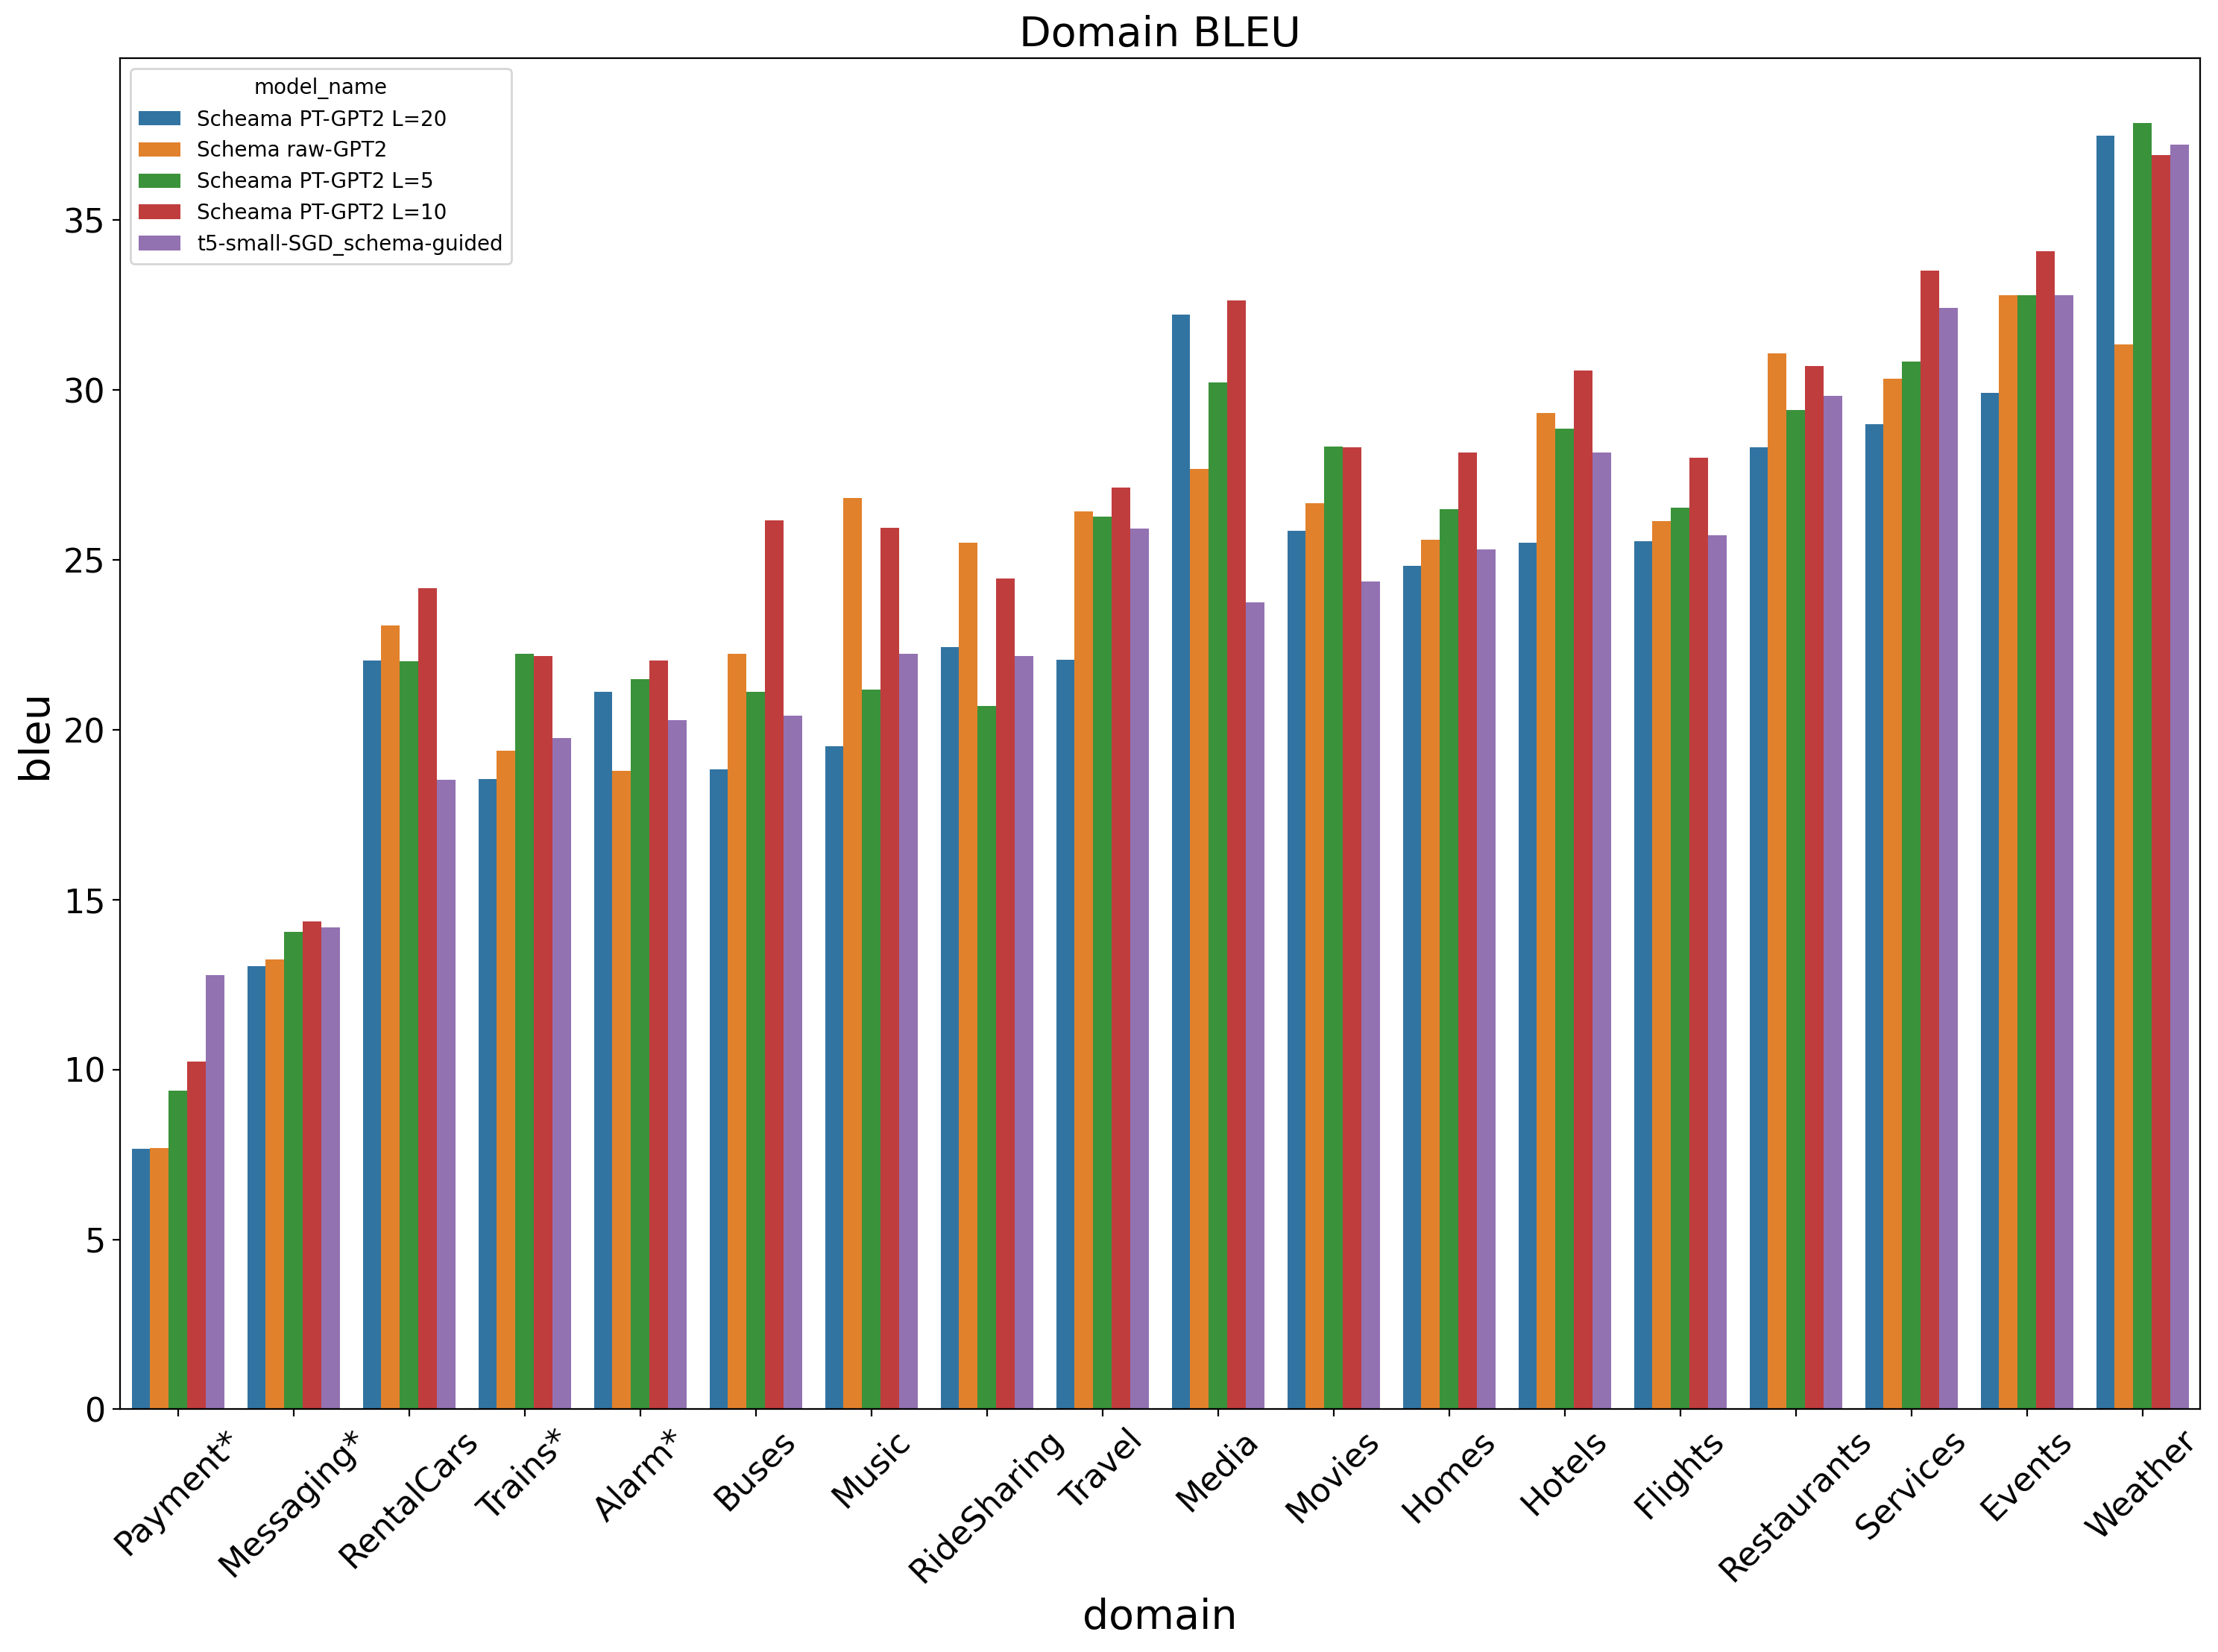

In [23]:
plot_domain_metric(ser_domain_df, 'bleu', 'Domain BLEU')

<AxesSubplot:title={'center':'Domain SER'}, xlabel='domain', ylabel='ser'>

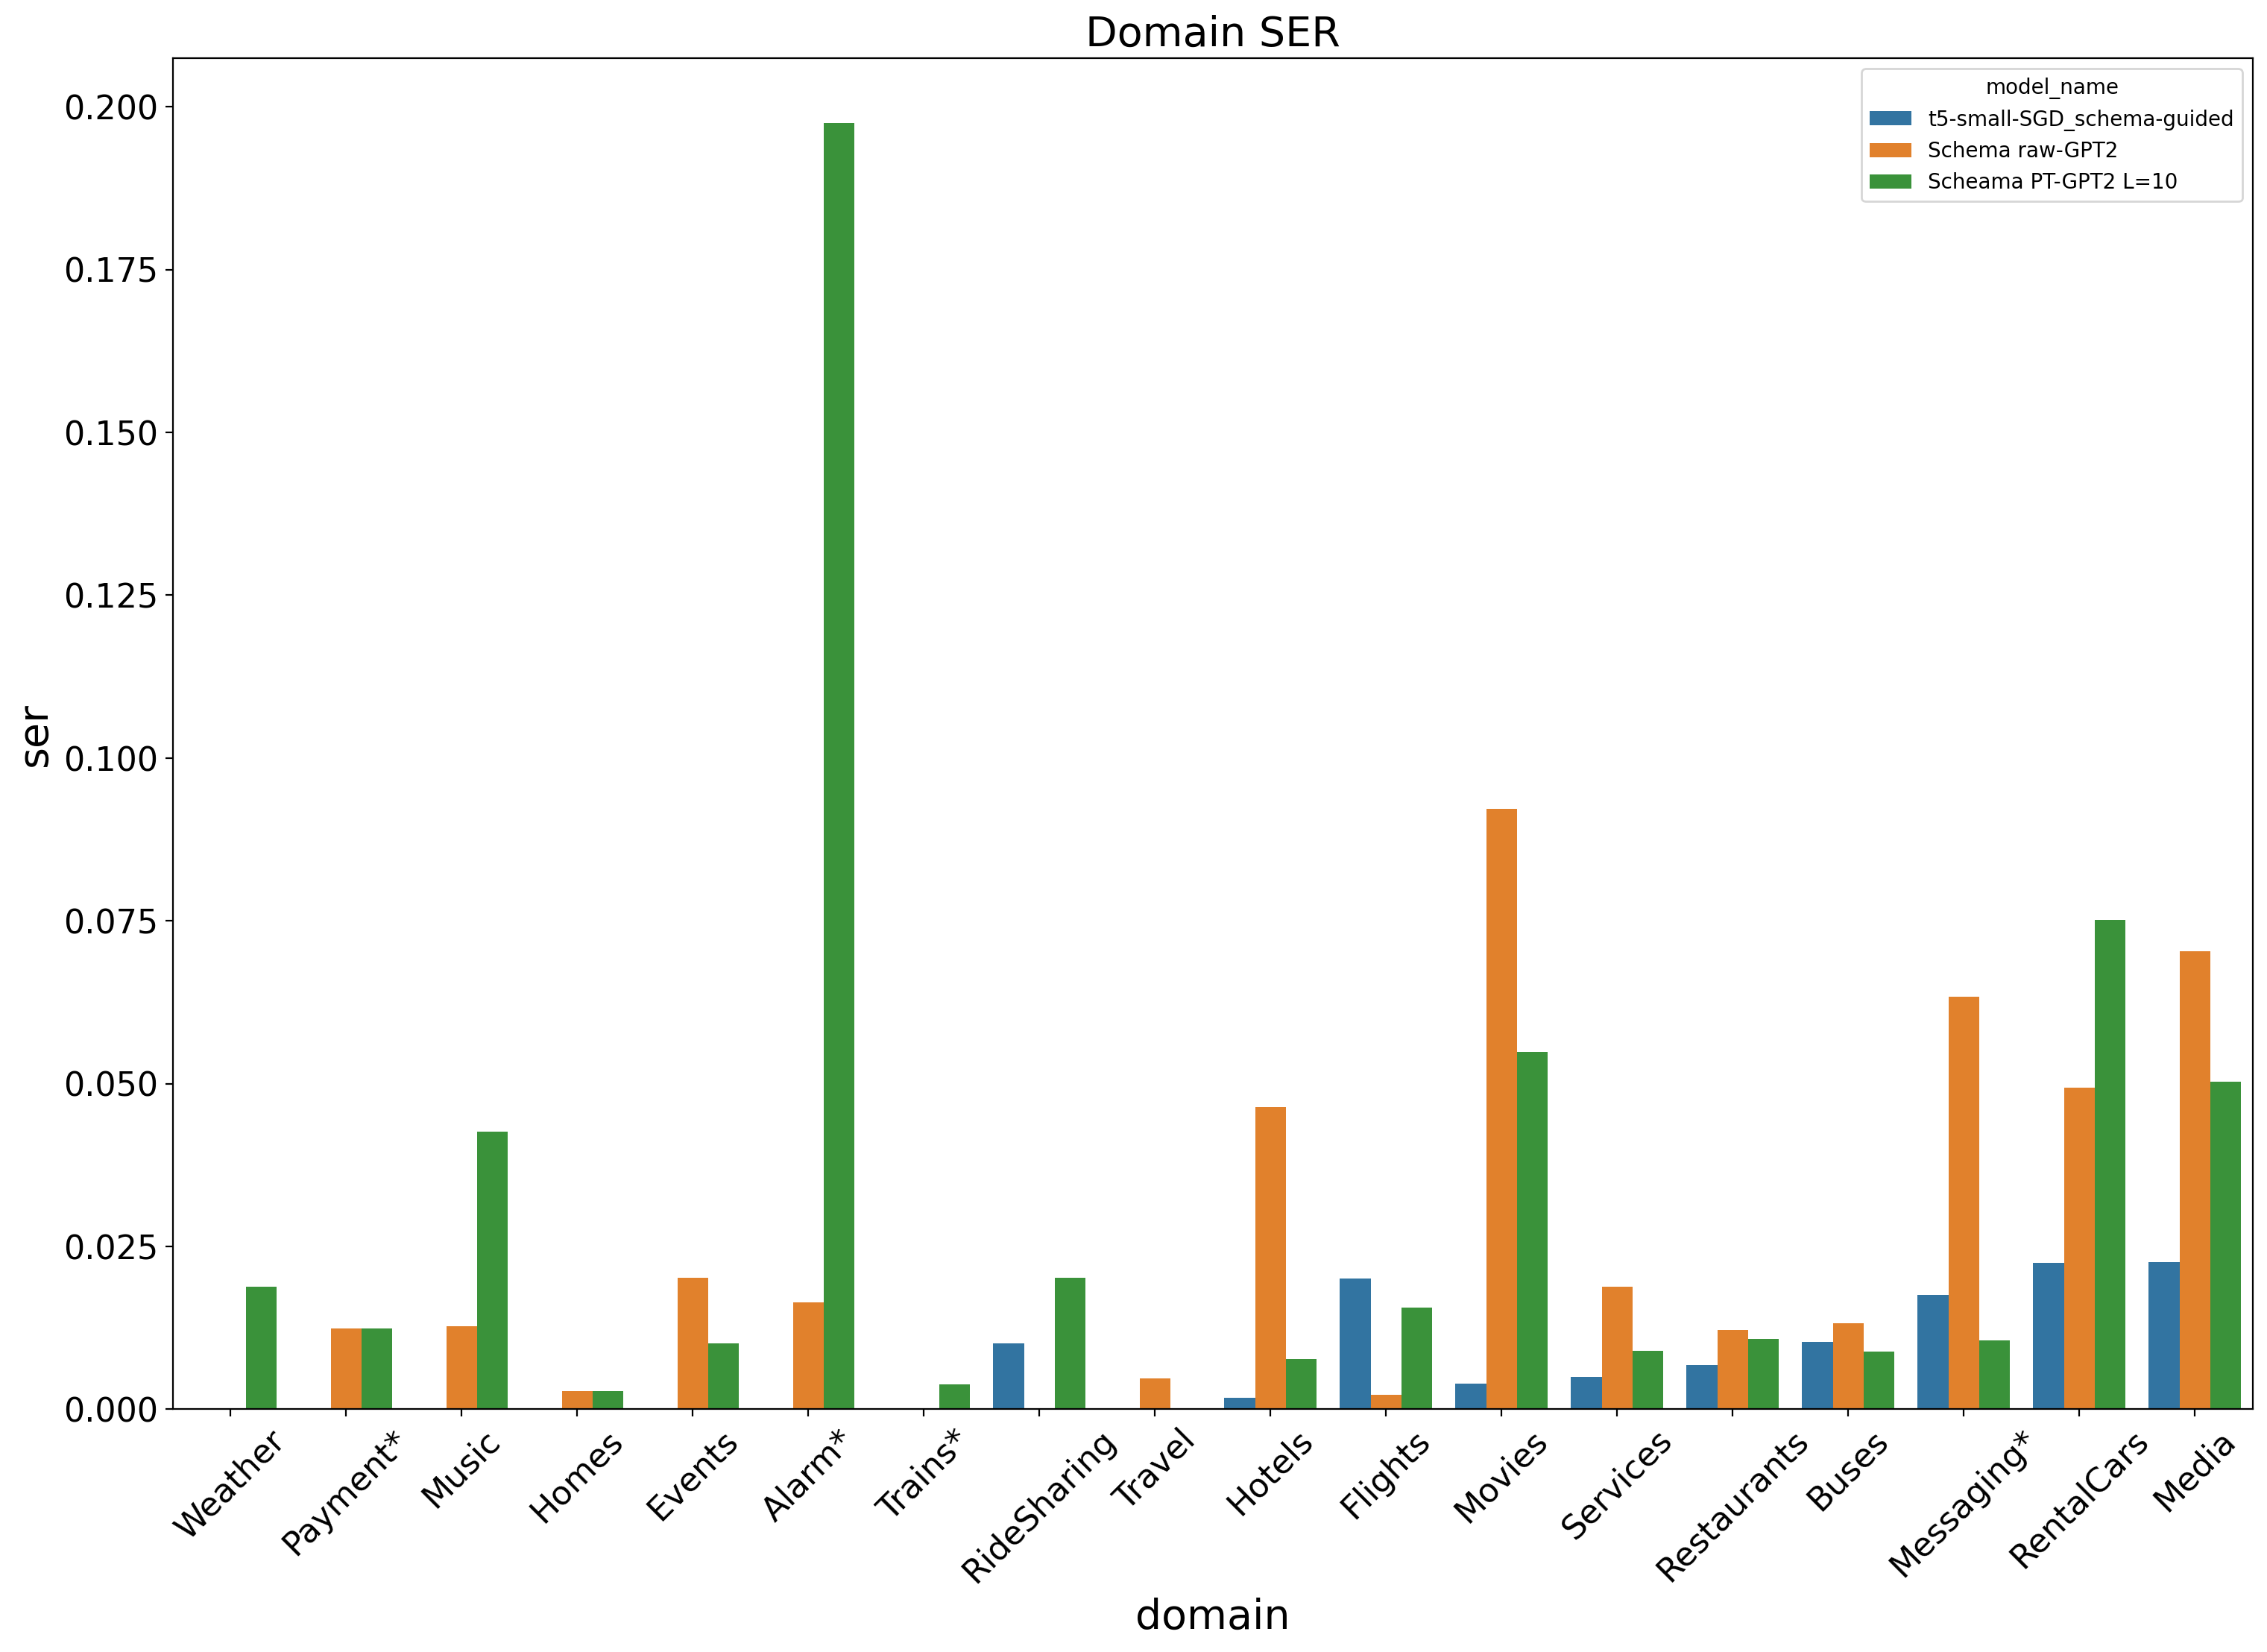

In [26]:
plot_domain_metric(ser_domain_df, 'ser', 'Domain SER')

In [40]:
ax = sns.barplot(data=domain_ser_df,x='domain',y='ser')
ax.title

NameError: name 'domain_ser_df' is not defined

In [41]:
plot_bar_comp(domain_ser_df, 'domain-ser')

NameError: name 'plot_bar_comp' is not defined

In [57]:
penguins = sns.load_dataset('penguins')

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

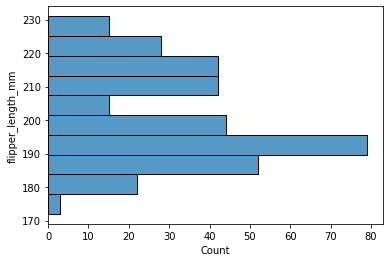

In [60]:
sns.histplot(data=penguins, y="flipper_length_mm")

In [26]:
res_df

,metrics,Kale 2020 naive,Kale 2020 schema,Kale 2020 T2G2,t5-small-SGD(naive-linear),"t5-small-SGD(paper-naive, epoch=5)",t5-small-SGD(schema-guided)
0,bleu,26.20,26.200,28.600,21.661678,19.552284,22.840755
1,ser,0.01,0.008,0.004,0.156100,0.215200,0.153800


In [37]:
case_df = read_bad_cases('t5-small-SGD', 'naive-linear', 'test-2-61245')

In [38]:
case_df

,Unnamed: 0,ref,pred,dialog_acts,domain,has_slot_error,PARENT-precision,PARENT-recall,PARENT-fscore
0,0,"Your rental has been booked, and you will pay $36.00 per day.",I have booked the table. The total cost per day is $36.00. The total cost,"[{'act': 4, 'slot': 'price_per_day', 'values': ['$36.00']}, {'act': 10, 'slot': '', 'values': []}]",RentalCars,False,0.413,0.003,0.006
1,1,You are picking up a hatchback from LGB Airport on March 9th at 5 pm and returning it on March 14th. You do not need additional insurance.,Please confirm: You want to pick up a Hatchback from LGB Airport on March,"[{'act': 2, 'slot': 'pickup_location', 'values': ['LGB Airport']}, {'act': 2, 'slot': 'start_date', 'values': ['March 9th']}, {'act': 2, 'slot': 'pickup_time', 'values': ['5 pm']}, {'act': 2, 'slot': 'end_date', 'values': ['March 14th']}, {'act': 2, 'slot': 'car_type', 'values': ['Hatchback']}, ...",RentalCars,True,0.354,0.003,0.006
2,2,"There are 10 houses available, of which there is a 4.4 rated house at 100 Capitol mall",I found 10 houses for you. There is a nice house at 100 Capitol mall with,"[{'act': 11, 'slot': 'address', 'values': ['100 Capitol mall']}, {'act': 11, 'slot': 'rating', 'values': ['4.4']}, {'act': 5, 'slot': 'count', 'values': ['10']}]",Hotels,True,0.572,0.003,0.006
3,3,It has a garage and 3 bedrooms.,The hotel has 3 bedrooms and 3 bedrooms. They have a 3 bed room and 3 bath,"[{'act': 4, 'slot': 'has_garage', 'values': ['True']}, {'act': 4, 'slot': 'number_of_beds', 'values': ['3']}]",Homes,False,0.714,0.354,0.473
4,4,How about Mamma Knows Best by Jessie J from album Who You Are.,I found Mamma Knows Best by Jessie J from the album Who You Are,"[{'act': 11, 'slot': 'track', 'values': ['Mamma Knows Best']}, {'act': 11, 'slot': 'artist', 'values': ['Jessie J']}, {'act': 11, 'slot': 'album', 'values': ['Who You Are']}]",Music,False,0.831,0.003,0.006
...,...,...,...,...,...,...,...,...,...
9995,9995,"Sure, I found 1 movie for you, Once Upon a Time In Hollywood.",I found 1 movie that matches your search. It is called Once Upon a Time In,"[{'act': 11, 'slot': 'title', 'values': ['Once Upon a Time In Hollywood']}, {'act': 5, 'slot': 'count', 'values': ['1']}]",Media,True,0.647,0.707,0.676
9996,9996,Have a nice day.,Have a great day.,"[{'act': 3, 'slot': '', 'values': []}]",Homes,False,NaN,NaN,NaN
9997,9997,Where are you interested in?,Where are you located?,"[{'act': 13, 'slot': 'location', 'values': []}]",Restaurants,False,NaN,NaN,NaN
9998,9998,The ride will be there in 6 minutes and the sum to pay is $15.46,Your ride is booked and the cab is on its way. The ride will be in 6,"[{'act': 4, 'slot': 'wait_time', 'values': ['6']}, {'act': 4, 'slot': 'ride_fare', 'values': ['$15.46']}, {'act': 10, 'slot': '', 'values': []}]",RideSharing,True,0.541,0.707,0.613


In [157]:
bad_cases = case_df[case_df['has_slot_error']==True][['domain', 'ref','pred', 'dialog_acts','has_slot_error']]
bad_cases[bad_cases['domain'] == 'RentalCars'].head(20)

,domain,ref,pred,dialog_acts,has_slot_error
1,RentalCars,You are picking up a hatchback from LGB Airport on March 9th at 5 pm and returning it on March 14th. You do not need additional insurance.,Please confirm: You want to pick up a Hatchback from LGB Airport on March,"[{'act': 2, 'slot': 'pickup_location', 'values': ['LGB Airport']}, {'act': 2, 'slot': 'start_date', 'values': ['March 9th']}, {'act': 2, 'slot': 'pickup_time', 'values': ['5 pm']}, {'act': 2, 'slot': 'end_date', 'values': ['March 14th']}, {'act': 2, 'slot': 'car_type', 'values': ['Hatchback']}, ...",True
62,RentalCars,"You will pick up a hatchback car with no insurance from Union Station on March 9th at 11 am, and will plan on dropping it off on March 14th correct?",Please confirm: You want to pick up a Hatchback from Union Station on March 9,"[{'act': 2, 'slot': 'pickup_location', 'values': ['Union Station']}, {'act': 2, 'slot': 'start_date', 'values': ['March 9th']}, {'act': 2, 'slot': 'pickup_time', 'values': ['11 am']}, {'act': 2, 'slot': 'end_date', 'values': ['March 14th']}, {'act': 2, 'slot': 'car_type', 'values': ['Hatchback']...",True
102,RentalCars,"I have found 4 cars which you might consider, with one of them being a SUV GMC Terrain, which you can pick up at SFO International Airport.",I found 4 cars for you. There is a GMC Terrain available at SFO,"[{'act': 11, 'slot': 'pickup_location', 'values': ['SFO International Airport']}, {'act': 11, 'slot': 'car_type', 'values': ['SUV']}, {'act': 11, 'slot': 'car_name', 'values': ['GMC Terrain']}, {'act': 5, 'slot': 'count', 'values': ['4']}]",True
136,RentalCars,Please confirm your reservation for a Sedan from Benito Juarez International Airport from March 8th at 2 pm to March 13th.,Please confirm: You want me to book a Sedan for you to pick up from Ben,"[{'act': 2, 'slot': 'pickup_location', 'values': ['Benito Juarez International Airport']}, {'act': 2, 'slot': 'start_date', 'values': ['March 8th']}, {'act': 2, 'slot': 'pickup_time', 'values': ['2 pm']}, {'act': 2, 'slot': 'end_date', 'values': ['March 13th']}, {'act': 2, 'slot': 'car_type', 'v...",True
152,RentalCars,Please confirm you would like to reserve a hatchback car with no insurance from March 4th to March 9th and will pick it up at 10:30 am from Union Plaza.,Please confirm: You want to pick up a Hatchback from Union Plaza on March 4,"[{'act': 2, 'slot': 'pickup_location', 'values': ['Union Plaza']}, {'act': 2, 'slot': 'start_date', 'values': ['March 4th']}, {'act': 2, 'slot': 'pickup_time', 'values': ['10:30 am']}, {'act': 2, 'slot': 'end_date', 'values': ['March 9th']}, {'act': 2, 'slot': 'car_type', 'values': ['Hatchback']...",True
168,RentalCars,Please confirm whether you want the car for rent on March 11th or March 7th and tell me the number of days you want the car and also let me know your convenient time to book the same.,When do you want to end? When do you want to pick it up? When do you,"[{'act': 13, 'slot': 'end_date', 'values': []}, {'act': 13, 'slot': 'pickup_time', 'values': []}, {'act': 13, 'slot': 'start_date', 'values': ['March 11th', 'March 7th']}]",True
219,RentalCars,There is a SUV Alfa Romeo Stelvio available at Port Authority Station.,There is a nice car available at Port Authority Station. It is a Alfa Romeo,"[{'act': 11, 'slot': 'pickup_location', 'values': ['Port Authority Station']}, {'act': 11, 'slot': 'car_type', 'values': ['SUV']}, {'act': 11, 'slot': 'car_name', 'values': ['Alfa Romeo Stelvio']}]",True
224,RentalCars,There would be 5 cars available including a nice car at Sky Harbor International Airport called a Sedan Buick Regal Sportback.,I found 5 cars that you might like. There is a nice car available at Sky Harbor,"[{'act': 11, 'slot': 'pickup_location', 'values': ['Sky Harbor International Airport']}, {'act': 11, 'slot': 'car_type', 'values': ['Sedan']}, {'act': 11, 'slot': 'car_name', 'values': ['Buick Regal Sportback']}, {'act': 5, 'slot': 'count', 'values': ['5']}]",True
501,RentalCars,"There are 10 cars I